In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
from PIL import Image, ImageOps
import numpy as np
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import random

In [2]:
def process_folder(dirpath, samp=100):
    dirpath = dirpath.joinpath('Bmp')
    x_data = []
    y_data = []
    for it in dirpath.iterdir():
        if not it.is_dir():
            continue
        y_label = int(it.stem[-3:]) - 1
        # print(y_label)
        # print(len(os.listdir(it)))
        lst = random.choices(list(it.iterdir()), k=samp)
        for it2 in lst:
            img = Image.open(it2)
            img = ImageOps.grayscale(img)
            img = img.resize((32, 32))
            arr = np.asarray(img) / 255.0
            arr = arr.reshape(arr.shape + (1,))
            y_d = np.zeros((62,))
            y_d[y_label] = 1
            y_data.append(y_d.copy())
            x_data.append(arr.copy())
    return  np.array(x_data),  np.array(y_data)

In [3]:
dirpath = pathlib.Path.cwd().joinpath('data/c74k/GoodImg/')
x_train, y_train = process_folder(dirpath)

dirpath = pathlib.Path.cwd().joinpath('data/c74k/BadImag/')
x_train_2, y_train_2 = process_folder(dirpath, samp=20)

x_train, y_train = np.concatenate((x_train, x_train_2)), np.concatenate((y_train, y_train_2))

dirpath = pathlib.Path.cwd().joinpath('data/c74k/BadImag/')
x_test, y_test = process_folder(dirpath, samp=20)


In [4]:
x_train, y_train = shuffle(x_train, y_train, random_state=0)
x_test, y_test = shuffle(x_test, y_test, random_state=0)

In [5]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

In [6]:
len(x_train), len(x_test)

(7440, 620)

In [7]:
image = Image.fromarray(x_train[0].reshape((32, 32)) * 255.0)
image = image.convert('L')

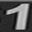

In [8]:
image

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same",input_shape=(32, 32, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))
# model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
# model.add(tf.keras.layers.BatchNormalization())

: 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0

In [11]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(62, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, validation_data=(x_val, y_val), epochs=20)

Epoch 1/20
59/59 [==============================] - 2s 39ms/step - loss: 3.9175 - accuracy: 0.0966 - val_loss: 4.1550 - val_accuracy: 0.0161
Epoch 2/20
59/59 [==============================] - 2s 37ms/step - loss: 2.2699 - accuracy: 0.4208 - val_loss: 4.6350 - val_accuracy: 0.0242
Epoch 3/20
59/59 [==============================] - 2s 40ms/step - loss: 1.1930 - accuracy: 0.6762 - val_loss: 5.1075 - val_accuracy: 0.0226
Epoch 4/20
59/59 [==============================] - 2s 38ms/step - loss: 0.8014 - accuracy: 0.7722 - val_loss: 5.1078 - val_accuracy: 0.0210
Epoch 5/20
59/59 [==============================] - 2s 39ms/step - loss: 0.5854 - accuracy: 0.8423 - val_loss: 5.2870 - val_accuracy: 0.0371
Epoch 6/20
59/59 [==============================] - 2s 37ms/step - loss: 0.4480 - accuracy: 0.8792 - val_loss: 5.3488 - val_accuracy: 0.0565
Epoch 7/20
59/59 [==============================] - 2s 38ms/step - loss: 0.3654 - accuracy: 0.9007 - val_loss: 5.5874 - val_accuracy: 0.0516
Epoch 8/20
59

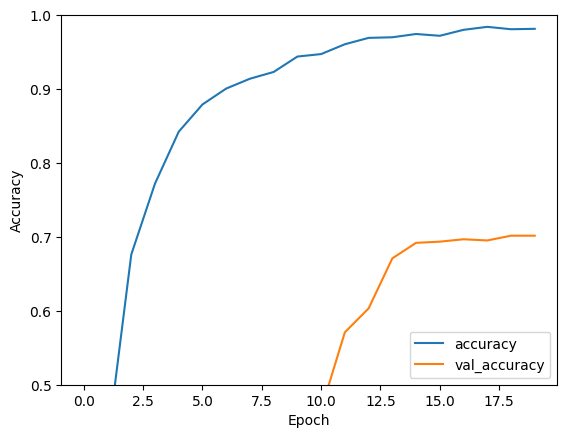

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [15]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

20/20 - 0s - loss: 1.7346 - accuracy: 0.7016 - 120ms/epoch - 6ms/step


In [16]:
test_acc

0.7016128897666931

In [17]:
test_loss

1.734621524810791

In [18]:
len(x_test)

620